In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
%matplotlib inline

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')

In [7]:
df=df.iloc[:,2:]

In [8]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [10]:
X=df.iloc[:,[0,1]]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
model=Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3894 - loss: 4779.2993 - val_accuracy: 0.3500 - val_loss: 1548.8523
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4411 - loss: 944.9362 - val_accuracy: 0.6500 - val_loss: 1068.9260
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6330 - loss: 1017.2317 - val_accuracy: 0.3500 - val_loss: 146.3829
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3738 - loss: 307.0028 - val_accuracy: 0.6500 - val_loss: 184.5164
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6940 - loss: 239.2505 - val_accuracy: 0.3500 - val_loss: 247.3820
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4436 - loss: 160.1328 - val_accuracy: 0.3500 - val_loss: 37.7567
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5164 - loss: 41.1104 - val_accuracy: 0.6500 - val_loss: 84.6010
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5826 - loss:

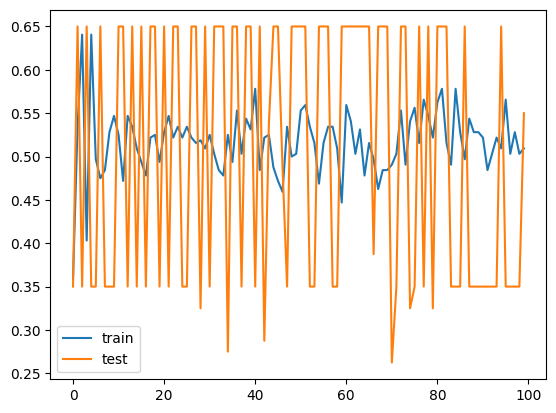

In [14]:
sns.lineplot(x=history.epoch,y=history.history['accuracy'],label='train')
sns.lineplot(x=history.epoch,y=history.history['val_accuracy'],label='test')
plt.legend()

DUE TO DATA OF DIFFERENT SCALES THE ACCURACY IS FLUCTUATING AND DOES NOT GIVE PROPER RESULT

### SCALING

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Since the max and min of the salary column is not known we prefer using standard scaler rather than MinMaxScaler

In [17]:
model=Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6342 - loss: 0.6636 - val_accuracy: 0.8125 - val_loss: 0.6184
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8124 - loss: 0.6104 - val_accuracy: 0.8875 - val_loss: 0.5615
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8615 - loss: 0.5661 - val_accuracy: 0.8750 - val_loss: 0.5109
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8715 - loss: 0.5303 - val_accuracy: 0.9000 - val_loss: 0.4686
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8652 - loss: 0.5013 - val_accuracy: 0.9000 - val_loss: 0.4325
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8490 - loss: 0.4818 - val_accuracy: 0.8875 - val_loss: 0.4006
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8730 - loss: 0.4481 - val_accuracy: 0.8750 - val_loss: 0.3725
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8606 - loss: 0.4250 - val_accuracy: 0.

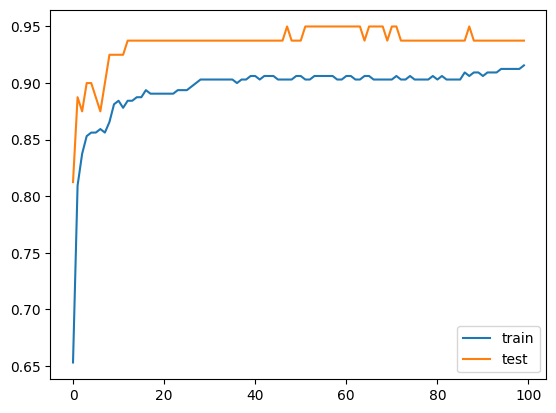

In [19]:
sns.lineplot(x=history.epoch,y=history.history['accuracy'],label='train')
sns.lineplot(x=history.epoch,y=history.history['val_accuracy'],label='test')
plt.legend()

AFTER SCALING THE ACCURACY IS UNIFORMLY INCREASING AND CONVERGENCE IS FASTER AND BETTER